In [1]:
## Setup
import yfinance as yf
import pandas as pd
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")
del sp500["Dividends"]
del sp500["Stock Splits"]
print(sp500)

/Users/scotthanna/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/scotthanna/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


                                  Open         High          Low        Close  \
Date                                                                            
1927-12-30 00:00:00-05:00    17.660000    17.660000    17.660000    17.660000   
1928-01-03 00:00:00-05:00    17.760000    17.760000    17.760000    17.760000   
1928-01-04 00:00:00-05:00    17.719999    17.719999    17.719999    17.719999   
1928-01-05 00:00:00-05:00    17.549999    17.549999    17.549999    17.549999   
1928-01-06 00:00:00-05:00    17.660000    17.660000    17.660000    17.660000   
...                                ...          ...          ...          ...   
2024-10-18 00:00:00-04:00  5859.430176  5872.169922  5846.109863  5864.669922   
2024-10-21 00:00:00-04:00  5857.819824  5866.919922  5824.790039  5853.979980   
2024-10-22 00:00:00-04:00  5832.700195  5863.040039  5821.169922  5851.200195   
2024-10-23 00:00:00-04:00  5834.500000  5834.850098  5762.410156  5797.419922   
2024-10-24 00:00:00-04:00  5

In [2]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-10-11 00:00:00-04:00', '2024-10-14 00:00:00-04:00',
               '2024-10-15 00:00:00-04:00', '2024-10-16 00:00:00-04:00',
               '2024-10-17 00:00:00-04:00', '2024-10-18 00:00:00-04:00',
               '2024-10-21 00:00:00-04:00', '2024-10-22 00:00:00-04:00',
               '2024-10-23 00:00:00-04:00', '2024-10-24 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24321, freq=None)

<AxesSubplot:xlabel='Date'>

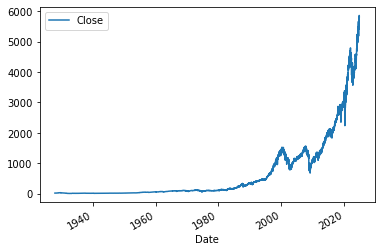

In [3]:
sp500.plot.line(y="Close", use_index=True)

In [4]:
##Creates Tomorrow Column
sp500["Tomorrow"]=sp500["Close"].shift(-1)
sp500


,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-10-18 00:00:00-04:00,5859.430176,5872.169922,5846.109863,5864.669922,3374490000,5853.979980
2024-10-21 00:00:00-04:00,5857.819824,5866.919922,5824.790039,5853.979980,3407010000,5851.200195
2024-10-22 00:00:00-04:00,5832.700195,5863.040039,5821.169922,5851.200195,3342080000,5797.419922


In [71]:
##sets up Target column
sp500["Target"]= (sp500["Tomorrow"]>sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-07-22 00:00:00-04:00,5544.540039,5570.359863,5529.040039,5564.410156,3375180000,5555.740234,0
2024-07-23 00:00:00-04:00,5565.299805,5585.339844,5550.899902,5555.740234,3500210000,5427.129883,0
2024-07-24 00:00:00-04:00,5505.839844,5508.040039,5419.979980,5427.129883,3945550000,5399.220215,0


In [72]:
## Removes data from before a certain date
sp500=sp500.loc["1990-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-07-22 00:00:00-04:00,5544.540039,5570.359863,5529.040039,5564.410156,3375180000,5555.740234,0
2024-07-23 00:00:00-04:00,5565.299805,5585.339844,5550.899902,5555.740234,3500210000,5427.129883,0
2024-07-24 00:00:00-04:00,5505.839844,5508.040039,5419.979980,5427.129883,3945550000,5399.220215,0


In [73]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=100, min_samples_split = 100, random_state=1)
train = sp500.iloc[:-100]
test=sp500.iloc[-100:]
predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [74]:
from sklearn.metrics import precision_score

preds=model.predict(test[predictors])
preds= pd.Series(preds, index=test.index)
preds

Date
2024-03-05 00:00:00-05:00    0
2024-03-06 00:00:00-05:00    0
2024-03-07 00:00:00-05:00    0
2024-03-08 00:00:00-05:00    0
2024-03-11 00:00:00-04:00    0
                            ..
2024-07-22 00:00:00-04:00    0
2024-07-23 00:00:00-04:00    0
2024-07-24 00:00:00-04:00    0
2024-07-25 00:00:00-04:00    0
2024-07-26 00:00:00-04:00    0
Length: 100, dtype: int64

In [75]:
precision_score(test["Target"],preds)

0.7142857142857143

<AxesSubplot:xlabel='Date'>

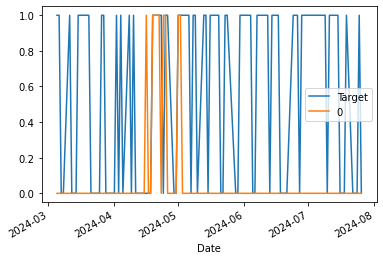

In [76]:
combined = pd.concat([test["Target"],preds], axis=1)
combined.plot()

In [77]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds=model.predict(test[predictors])
    preds= pd.Series(preds, index=test.index, name = "Predictions")
    combined = pd.concat([test["Target"],preds], axis=1)
    return combined

In [78]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train=data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions=predict(train,test,predictors,model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [79]:
predictions = backtest(sp500, model, predictors)

In [80]:
predictions["Predictions"].value_counts()

0    3612
1    2596
Name: Predictions, dtype: int64

In [81]:
precision_score(predictions["Target"],predictions["Predictions"])

0.5288906009244992

In [93]:
horizons = [2,5,60,250,1000]
new_predictors = []

Prominent_stocks = ["MSFT", "NVDA", "AAPL", "AMZN","META"]

for ticker in Prominent_stocks:
    Stock= yf.Ticker(item)
    Stock=Stock.history(period="max")
    Stock["Next"]=Stock["Close"].shift(-1)
    Stock["Buy/Sell"] = (Stock["Next"]>Stock["Close"]).astype(int)
    Stock=Stock.loc["1990-01-01":].copy()
    for time in horizons[:3]:
        ra = sp500.rolling(horizon).mean()
        rc= f"{ticker}_Close_Ratio_{horizon}"
        sp500[rc] = Stock["Close"]/ra["Close"]
        tc = f"{ticker}_Up/Down_{time}"
        sp500[tc] = Stock.shift(1).rolling(time).sum()["Buy/Sell"]
        new_predictors+=[rc,tc]

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"]/rolling_averages["Close"]
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    new_predictors+=[ratio_column,trend_column]
sp500

/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_71873/378049720.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500[rc] = Stock["Close"]/ra["Close"]
/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_71873/378049720.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500[tc] = Stock.shift(1).rolling(time).sum()["Buy/Sell"]
/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_71873/378049720.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,...,AAPL_Up/Down_5,AAPL_Up/Down_60,AMZN_Close_Ratio_1000,AMZN_Up/Down_2,AMZN_Up/Down_5,AMZN_Up/Down_60,META_Close_Ratio_1000,META_Up/Down_2,META_Up/Down_5,META_Up/Down_60
Date,,,,,,,,,,,,,,,,,,,,,
2012-08-14 00:00:00-04:00,1404.359985,1410.030029,1400.599976,1403.930054,2930900000,1405.530029,1,NaN,NaN,NaN,...,2.0,23.0,NaN,0.0,2.0,23.0,NaN,0.0,2.0,23.0
2012-08-15 00:00:00-04:00,1403.890015,1407.729980,1401.829956,1405.530029,2655750000,1415.510010,1,1.000569,NaN,NaN,...,3.0,24.0,NaN,1.0,3.0,24.0,NaN,1.0,3.0,24.0
2012-08-16 00:00:00-04:00,1405.569946,1417.439941,1404.150024,1415.510010,3114100000,1418.160034,1,1.003538,2.0,NaN,...,2.0,24.0,NaN,1.0,2.0,24.0,NaN,1.0,2.0,24.0
2012-08-17 00:00:00-04:00,1415.839966,1418.709961,1414.670044,1418.160034,2922990000,1418.130005,0,1.000935,2.0,NaN,...,1.0,23.0,NaN,0.0,1.0,23.0,NaN,0.0,1.0,23.0
2012-08-20 00:00:00-04:00,1417.849976,1418.130005,1412.119995,1418.130005,2766320000,1413.170044,0,0.999989,1.0,1.004162,...,2.0,23.0,NaN,1.0,2.0,23.0,NaN,1.0,2.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-19 00:00:00-04:00,5543.370117,5557.500000,5497.040039,5505.000000,3760570000,5564.410156,1,0.996417,0.0,0.985278,...,2.0,34.0,0.111692,2.0,2.0,34.0,0.111692,2.0,2.0,34.0
2024-07-22 00:00:00-04:00,5544.540039,5570.359863,5529.040039,5564.410156,3375180000,5555.740234,0,1.005367,1.0,0.998299,...,3.0,35.0,0.114115,2.0,3.0,35.0,0.114115,2.0,3.0,35.0
2024-07-23 00:00:00-04:00,5565.299805,5585.339844,5550.899902,5555.740234,3500210000,5427.129883,0,0.999220,1.0,1.000745,...,4.0,36.0,0.114356,2.0,4.0,36.0,0.114356,2.0,4.0,36.0


In [112]:
sp500=sp500.dropna()

total_profit=0
total_profit += (sp500["Close"][0]-sp500["Open"][0])
total_profit

14.080078125

In [117]:
sp500.index[0]

Timestamp('2016-08-05 00:00:00-0400', tz='America/New_York')

In [99]:
model=RandomForestClassifier(n_estimators = 200, min_samples_split = 50, random_state=1)

In [104]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds=model.predict_proba(test[predictors])[:,1]
    preds[preds>=.6] = 1
    preds[preds <.6] = 0
    preds= pd.Series(preds, index=test.index, name = "Predictions")
    combined = pd.concat([test["Target"],preds], axis=1)
    return combined

In [105]:
predictions = backtest(sp500, model,  new_predictors)

ValueError: No objects to concatenate

In [60]:
predictions["Predictions"].value_counts()

0.0    4368
1.0     839
Name: Predictions, dtype: int64

In [61]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5744934445768772